In [1]:
from ACO import *
from Evaporator import *
from Initializer import *
from Intensifier import *
from Problem import TSPProblem
from SolutionGenerator import *
from Heuristics import TSPHeuristic
from Terminator import *
from EvolutionPlotter import plot_evolution
import numpy as np

In [2]:
import seaborn as sns

## Hyperparameters: rho vs. delta values

In [3]:
problem = TSPProblem(problem=1)
initializer = TSP_Initializer()
heuristic = None
terminator = [maxItTerminator(maxIt=200)]
solution_gen = PermutationSolutionGenerator(number_of_ants=10, alpha=1, beta=1, heuristic=heuristic, problem=problem)

In [4]:
rho_values = np.arange(0.04, 0.2, 0.04)
delta_values = np.arange(0.04, 0.2, 0.04)
best_scores = np.zeros(shape=(rho_values.shape[0], delta_values.shape[0]))
runs_per_config = 5

for i, rho in enumerate(rho_values):
    for j, delta in enumerate(delta_values):
        evaporator = Evaporator(rho=rho)
        intensifier = Intensifier(delta=delta)
        for k in range(runs_per_config):
            aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, False)
            solutions, scores = aco.run()
            best_scores[i,j] += scores[-1,0]
        best_scores[i,j] /= runs_per_config
        print('rho: %f, delta: %f, score: %d' % (rho, delta, best_scores[i,j]))

rho: 0.040000, delta: 0.040000, score: 23269
rho: 0.040000, delta: 0.080000, score: 23381
rho: 0.040000, delta: 0.120000, score: 22766
rho: 0.040000, delta: 0.160000, score: 22470
rho: 0.080000, delta: 0.040000, score: 20268
rho: 0.080000, delta: 0.080000, score: 20492
rho: 0.080000, delta: 0.120000, score: 19932
rho: 0.080000, delta: 0.160000, score: 19962
rho: 0.120000, delta: 0.040000, score: 18634
rho: 0.120000, delta: 0.080000, score: 18624
rho: 0.120000, delta: 0.120000, score: 18827
rho: 0.120000, delta: 0.160000, score: 18958
rho: 0.160000, delta: 0.040000, score: 17940
rho: 0.160000, delta: 0.080000, score: 17677
rho: 0.160000, delta: 0.120000, score: 17637
rho: 0.160000, delta: 0.160000, score: 18407


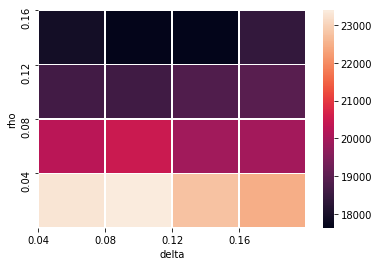

In [5]:
ax = sns.heatmap(np.flip(best_scores,axis=0), linewidth=0.5)
ax.set_xticks(np.arange(len(delta_values)))
ax.set_yticks(np.arange(len(rho_values)))
ax.set_xticklabels(np.round(delta_values,2))
ax.set_yticklabels(np.flip(np.round(rho_values,2),axis=0))
ax.set_xlabel('delta')
ax.set_ylabel('rho')
plt.show()

Actually it does not make sense to directly compare the rho and delta value as they are applied pretty much differently in mathemical terms: rho is the relative ratio of forgetting pheromone values while delta is the absolute value by which respective pheromone values are increased. Eventually both are influencing the degree by which the paths of new / best solutions are prefered over former solutions.

But what can be seen from the results above is that increasing the values leverages improvement of the score quite significantly and increasing rho (forgetting) has stronger impact than increasing delta by the same value. Relatively small values of rho (4%-16% "fading rate") and delta (4%-16% "increase rate" relativ to an initialization of 1) already accellerate convergence. Just choosing high values could be dangerous in terms of leading to early convergence to local optima.

## Hyperparameters: ants vs. rho / delta values

In [4]:
problem = TSPProblem(problem=1)
initializer = TSP_Initializer()
heuristic = None
terminator = [maxItTerminator(maxIt=200)]

In [7]:
update_values = np.arange(0.04, 0.2, 0.04)
numbers_of_ants = [1, 5, 10 ,15]
best_scores_1 = np.zeros(shape=(update_values.shape[0], len(numbers_of_ants)))
runs_per_config = 5

for i, update_value in enumerate(update_values):
    for j, ants in enumerate(numbers_of_ants):
        evaporator = Evaporator(rho=update_value)
        intensifier = Intensifier(delta=update_value)
        solution_gen = PermutationSolutionGenerator(number_of_ants=ants, alpha=1, beta=1, heuristic=heuristic, problem=problem)
        for k in range(runs_per_config):
            aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, False)
            solutions, scores = aco.run()
            best_scores_1[i,j] += scores[-1,0]
        best_scores_1[i,j] /= runs_per_config
        print('ants: %d, rho / delta: %f, score: %d' % (ants, update_value, best_scores_1[i,j]))

ants: 1, rho / delta: 0.040000, score: 30351
ants: 5, rho / delta: 0.040000, score: 24586
ants: 10, rho / delta: 0.040000, score: 23567
ants: 15, rho / delta: 0.040000, score: 22901
ants: 1, rho / delta: 0.080000, score: 29361
ants: 5, rho / delta: 0.080000, score: 21961
ants: 10, rho / delta: 0.080000, score: 20119
ants: 15, rho / delta: 0.080000, score: 18913
ants: 1, rho / delta: 0.120000, score: 29817
ants: 5, rho / delta: 0.120000, score: 21151
ants: 10, rho / delta: 0.120000, score: 18832
ants: 15, rho / delta: 0.120000, score: 17124
ants: 1, rho / delta: 0.160000, score: 30008
ants: 5, rho / delta: 0.160000, score: 20431
ants: 10, rho / delta: 0.160000, score: 18100
ants: 15, rho / delta: 0.160000, score: 16446


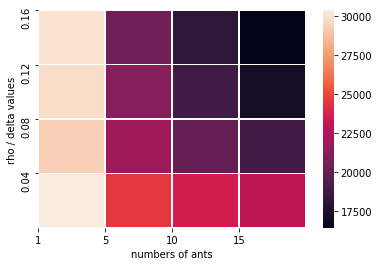

In [8]:
ax = sns.heatmap(np.flip(best_scores_1,axis=0), linewidth=0.5)
ax.set_xticks(np.arange(len(numbers_of_ants)))
ax.set_yticks(np.arange(len(update_values)))
ax.set_xticklabels(np.round(numbers_of_ants,2))
ax.set_yticklabels(np.flip(np.round(update_values,2),axis=0))
ax.set_xlabel('numbers of ants')
ax.set_ylabel('rho / delta values')
plt.show()

Evapuration / intensification and number of ants mutually amplify in the search for optimal solutions: Increasing the number of ants allows for exploring more possible solution in each iteration. Therefore the risk of getting stuck in bad local optima is decreased. Also with each iteration the more ants will follow pheromone trails which correspond to the best solutions found so far the higher the rho / delta values are.

## Risk of early convergence to (bad) local optima

In [5]:
terminator = [maxItTerminator(maxIt=2000), convergenceTerminator(maxIter=50)]
evaporator = Evaporator(rho=0.16)
intensifier = Intensifier(delta=0.16)
solution_gen = PermutationSolutionGenerator(number_of_ants=15, alpha=1, beta=0, heuristic=heuristic, problem=problem)
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, False)
solutions, scores = aco.run()

In [6]:
print('Best score for problem 1, alpha=1, beta=0: ', scores[-1,0])

Best score for problem 1, alpha=1, beta=0:  10257


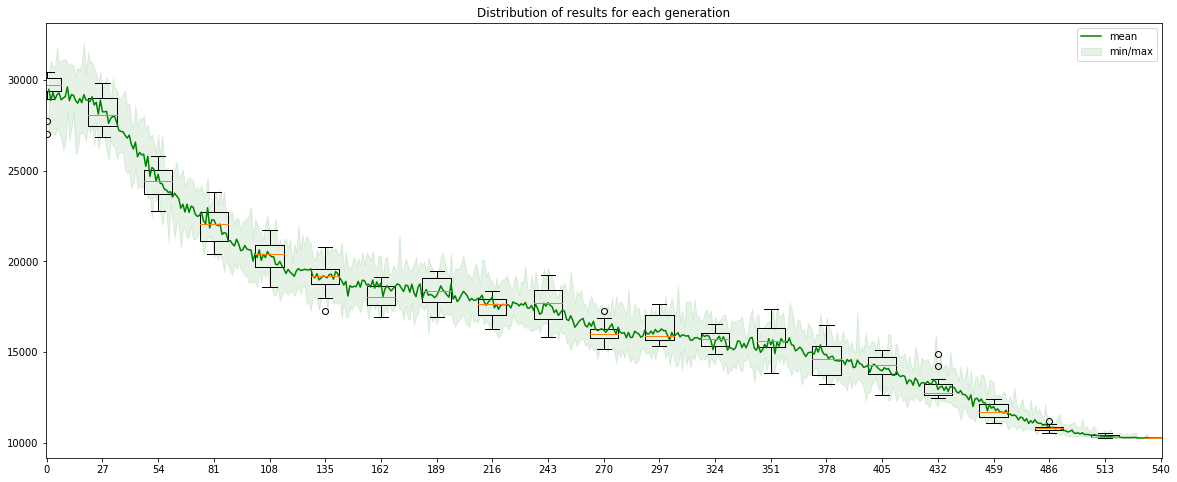

In [7]:
plot_evolution(scores, 20)

As expected the score improves quite fast due to the strong evapuration / intensification rate, but converges early to a high (bad) level, i.e. a local minimum.

## Hyperparameters: ants vs. considered number of solutions

In [9]:
problem = TSPProblem(problem=1)
initializer = TSP_Initializer()
evaporator = Evaporator(rho=0.06)
intensifier = Intensifier(delta=0.06)
heuristic = None
terminator = [maxItTerminator(maxIt=200)]

In [10]:
numbers_of_solutions = [1, 2, 3]
numbers_of_ants = [5, 10 ,15]
best_scores_2 = np.zeros(shape=(len(numbers_of_solutions), len(numbers_of_ants)))
runs_per_config = 5

for i, number_of_solutions in enumerate(numbers_of_solutions):
    for j, ants in enumerate(numbers_of_ants):
        solution_gen = PermutationSolutionGenerator(number_of_ants=ants, alpha=1, beta=1, heuristic=heuristic, problem=problem)
        for k in range(runs_per_config):
            aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen,
                                       terminator, number_of_solutions, True)
            solutions, scores = aco.run()
            best_scores_2[i,j] += scores[-1,0]
        best_scores_2[i,j] /= runs_per_config
        print('ants: %d, considered solutions: %d, score: %d' % (ants, number_of_solutions, best_scores_2[i,j]))

ants: 5, considered solutions: 1, score: 23225
ants: 10, considered solutions: 1, score: 20556
ants: 15, considered solutions: 1, score: 19959
ants: 5, considered solutions: 2, score: 23069
ants: 10, considered solutions: 2, score: 20794
ants: 15, considered solutions: 2, score: 19794
ants: 5, considered solutions: 3, score: 24813
ants: 10, considered solutions: 3, score: 21447
ants: 15, considered solutions: 3, score: 20212


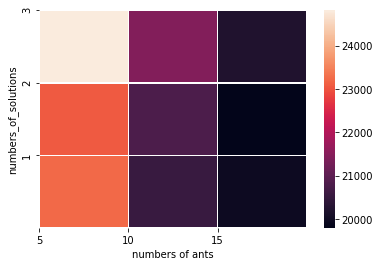

In [11]:
ax = sns.heatmap(np.flip(best_scores_2,axis=0), linewidth=0.5)
ax.set_xticks(np.arange(len(numbers_of_ants)))
ax.set_yticks(np.arange(len(numbers_of_solutions)))
ax.set_xticklabels(np.round(numbers_of_ants,2))
ax.set_yticklabels(np.flip(np.round(numbers_of_solutions,2),axis=0))
ax.set_xlabel('numbers of ants')
ax.set_ylabel('numbers_of_solutions')
plt.show()

Considering more than one solution depending on the quality (score) not necessarily leads to better results in early iterations as can be seen above. Still this may improve results over more iterations as a bigger search space is explored.

## Hyperparameters: with vs. without distance heuristic

In [3]:
problem = TSPProblem(problem=1)
initializer = TSP_Initializer()
evaporator = Evaporator(rho=0.06)
intensifier = Intensifier(delta=0.06)
terminator = [maxItTerminator(maxIt=200)]

In [4]:
heuristics = [TSPHeuristic, None]
numbers_of_ants = [1, 5, 10 ,15]
best_scores_3 = np.zeros(shape=(len(heuristics), len(numbers_of_ants)))
runs_per_config = 5

for i, heuristic in enumerate(heuristics):
    for j, ants in enumerate(numbers_of_ants):
        solution_gen = PermutationSolutionGenerator(number_of_ants=ants, alpha=1, beta=1, heuristic=heuristic, problem=problem)
        for k in range(runs_per_config):
            aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, False)
            solutions, scores = aco.run()
            best_scores_3[i,j] += scores[-1,0]
        best_scores_3[i,j] /= runs_per_config
        print('ants: %d, heuristic: %s, score: %d' % (ants, heuristic, best_scores_3[i,j]))

ants: 1, heuristic: <class 'Heuristics.TSPHeuristic'>, score: 7288
ants: 5, heuristic: <class 'Heuristics.TSPHeuristic'>, score: 5660
ants: 10, heuristic: <class 'Heuristics.TSPHeuristic'>, score: 5479
ants: 15, heuristic: <class 'Heuristics.TSPHeuristic'>, score: 5010
ants: 1, heuristic: None, score: 29568
ants: 5, heuristic: None, score: 22864
ants: 10, heuristic: None, score: 20607
ants: 15, heuristic: None, score: 19579


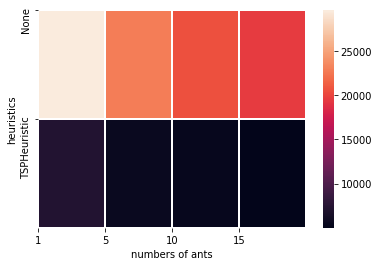

In [5]:
ax = sns.heatmap(np.flip(best_scores_3,axis=0), linewidth=0.5)
ax.set_xticks(np.arange(len(numbers_of_ants)))
ax.set_yticks(np.arange(len(heuristics)))
ax.set_xticklabels(np.round(numbers_of_ants,2))
ax.set_yticklabels(np.flip(['TSPHeuristic', 'None'],axis=0))
ax.set_xlabel('numbers of ants')
ax.set_ylabel('heuristics')
plt.show()

Applying the lowest distance heuristic leads to significantly better solutions right from the first iteration.

# Find optimal solutions for problem 1-3

Below for each problem (1-3) the following configurations are tested:
- alpha = 1, beta = 0 (without heuristic)
- alpha = 1, beta = 1 (with heuristic)
- alpha = 1, beta = 2 (with heuristic)
- alpha = 1, beta = 2 (with heuristic) + best 3 solutions / quality dependent pheromone update

## Find ACO solution for problem 1

In [8]:
problem = TSPProblem(problem=1)
initializer = TSP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.05)
heuristic = TSPHeuristic
solution_gen = PermutationSolutionGenerator(number_of_ants=50, alpha=1, beta=0, heuristic=None, problem=problem)
terminator = [maxItTerminator(maxIt=2000), convergenceTerminator(maxIter=50)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, False)

solutions_1, scores_1 = aco.run()

In [9]:
print('Best score for problem 1, alpha=1, beta=0: ', scores_1[-1,0])

Best score for problem 1, alpha=1, beta=0:  6155


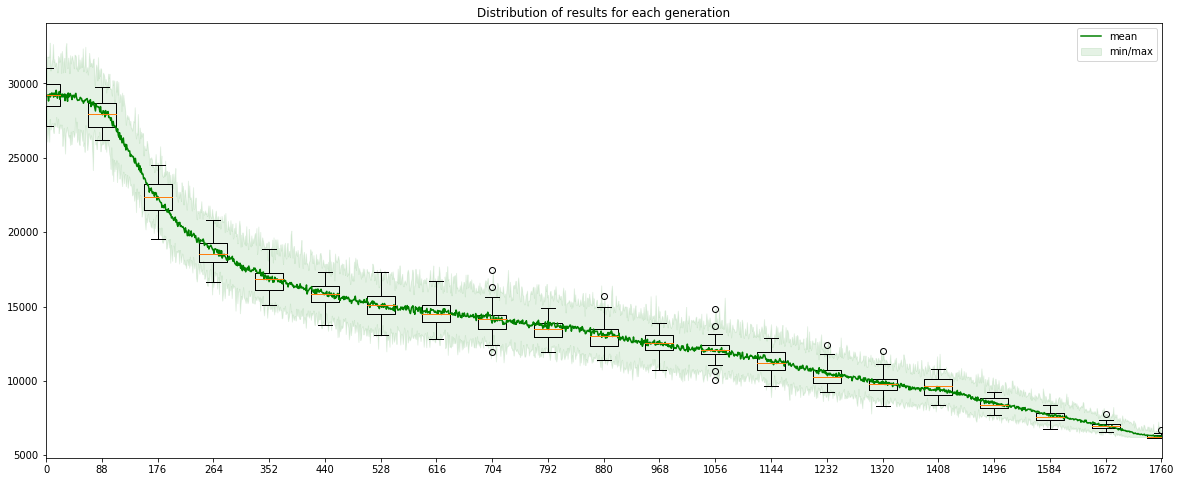

In [10]:
plot_evolution(scores_1, 20)

In [11]:
solution_gen = PermutationSolutionGenerator(number_of_ants=50, alpha=1, beta=1, heuristic=heuristic, problem=problem)
terminator = [maxItTerminator(maxIt=2000), convergenceTerminator(maxIter=50)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, False)

solutions_1, scores_1 = aco.run()

In [12]:
print('Best score for problem 1, alpha=1, beta=1: ', scores_1[-1,0])

Best score for problem 1, alpha=1, beta=1:  3824


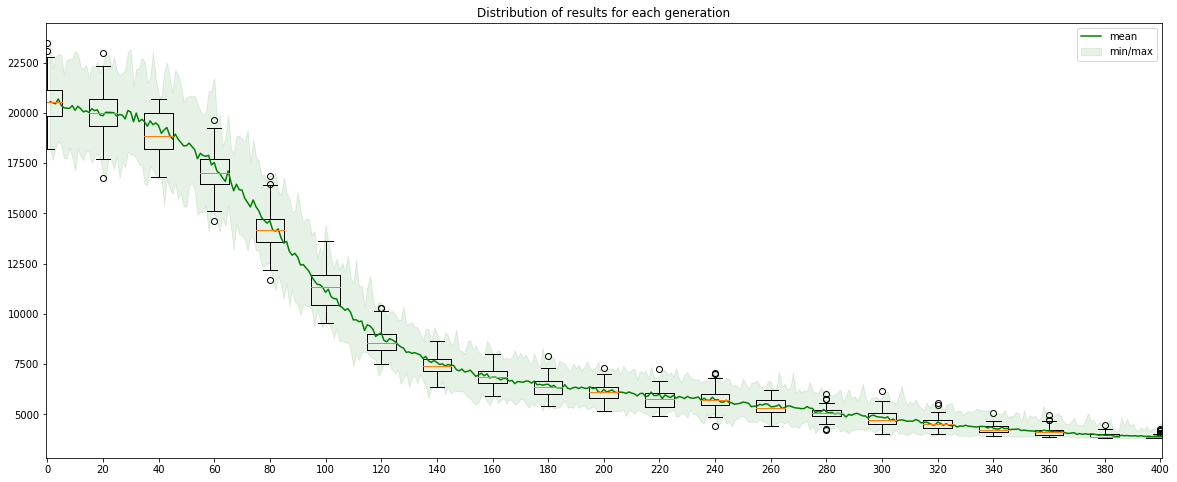

In [13]:
plot_evolution(scores_1, 20)

In [14]:
solution_gen = PermutationSolutionGenerator(number_of_ants=50, alpha=1, beta=2, heuristic=heuristic, problem=problem)
terminator = [maxItTerminator(maxIt=2000), convergenceTerminator(maxIter=50)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, False)

solutions_1, scores_1 = aco.run()

In [15]:
print('Best score for problem 1, alpha=1, beta=2: ', scores_1[-1,0])

Best score for problem 1, alpha=1, beta=2:  3747


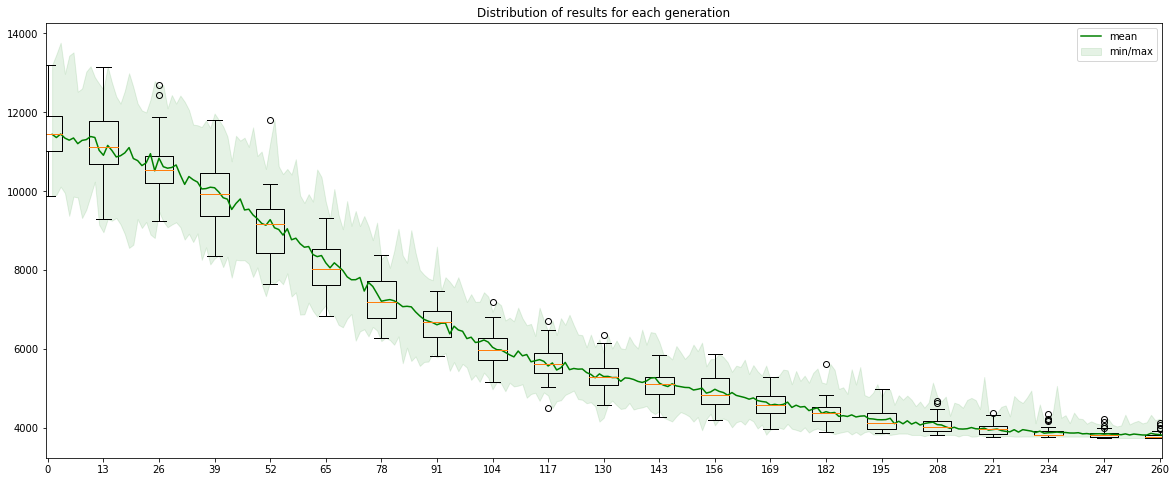

In [16]:
plot_evolution(scores_1, 20)

In [17]:
solution_gen = PermutationSolutionGenerator(number_of_ants=50, alpha=1, beta=2, heuristic=heuristic, problem=problem)
terminator = [maxItTerminator(maxIt=2000), convergenceTerminator(maxIter=50)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 3, True)

solutions_1, scores_1 = aco.run()

In [18]:
print('Best score for problem 1, alpha=1, beta=2 + quality dependent pheromone update: ', scores_1[-1,0])

Best score for problem 1, alpha=1, beta=2 + quality dependent pheromone update:  3652


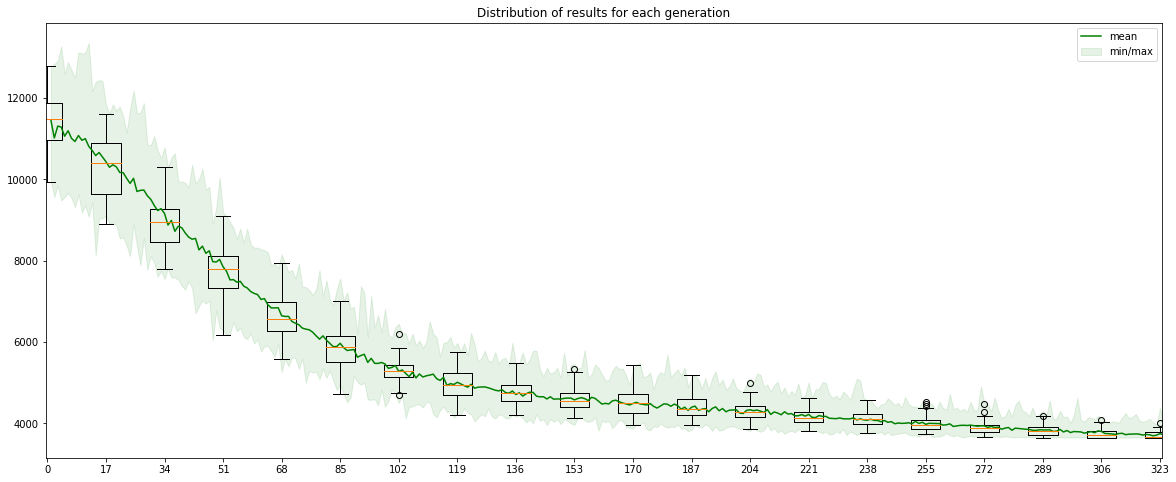

In [19]:
plot_evolution(scores_1, 20)

## Find ACO solution for problem 2

In [20]:
problem = TSPProblem(problem=2)
initializer = TSP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.05)
heuristic = TSPHeuristic
solution_gen = PermutationSolutionGenerator(number_of_ants=50, alpha=1, beta=0, heuristic=None, problem=problem)
terminator = [maxItTerminator(maxIt=2000), convergenceTerminator(maxIter=50)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, False)

solutions_2, scores_2 = aco.run()

In [21]:
print('Best score for problem 2, alpha=1, beta=0: ', scores_2[-1,0])

Best score for problem 2, alpha=1, beta=0:  5214


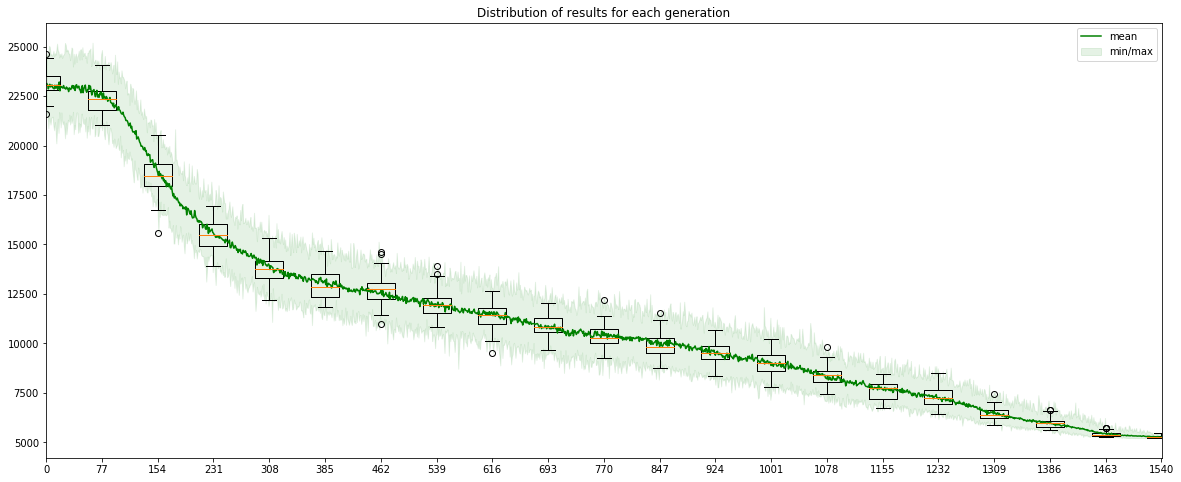

In [22]:
plot_evolution(scores_2, 20)

In [23]:
solution_gen = PermutationSolutionGenerator(number_of_ants=50, alpha=1, beta=1, heuristic=heuristic, problem=problem)
terminator = [maxItTerminator(maxIt=2000), convergenceTerminator(maxIter=50)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, False)

solutions_2, scores_2 = aco.run()

In [24]:
print('Best score for problem 2, alpha=1, beta=1: ', scores_2[-1,0])

Best score for problem 2, alpha=1, beta=1:  3153


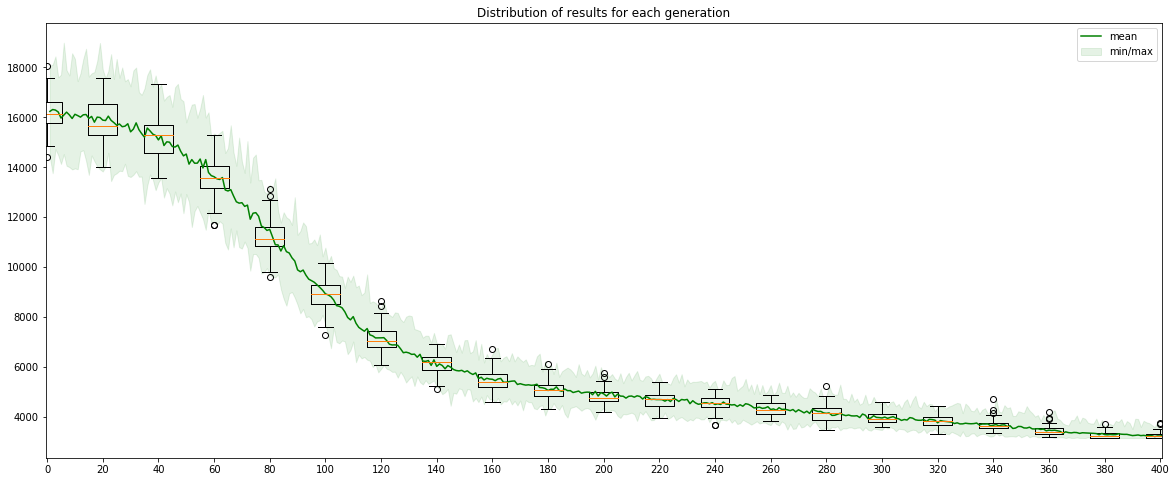

In [25]:
plot_evolution(scores_2, 20)

In [26]:
solution_gen = PermutationSolutionGenerator(number_of_ants=50, alpha=1, beta=2, heuristic=heuristic, problem=problem)
terminator = [maxItTerminator(maxIt=2000), convergenceTerminator(maxIter=50)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, False)

solutions_2, scores_2 = aco.run()

In [27]:
print('Best score for problem 2, alpha=1, beta=2: ', scores_2[-1,0])

Best score for problem 2, alpha=1, beta=2:  3006


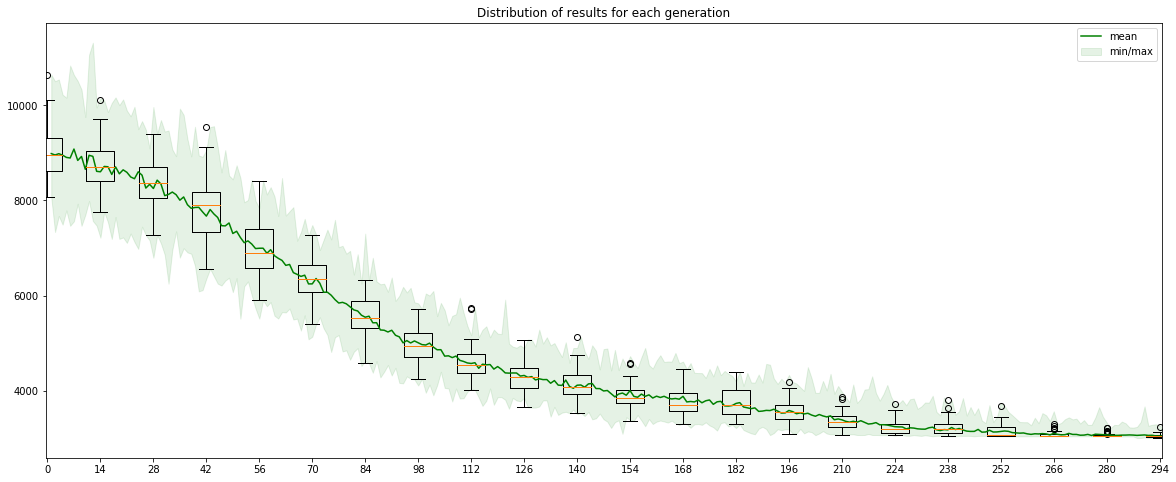

In [28]:
plot_evolution(scores_2, 20)

In [29]:
solution_gen = PermutationSolutionGenerator(number_of_ants=50, alpha=1, beta=2, heuristic=heuristic, problem=problem)
terminator = [maxItTerminator(maxIt=2000), convergenceTerminator(maxIter=50)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 3, True)

solutions_2, scores_2 = aco.run()

In [30]:
print('Best score for problem 2, alpha=1, beta=2 + quality dependent pheromone update: ', scores_2[-1,0])

Best score for problem 2, alpha=1, beta=2 + quality dependent pheromone update:  2941


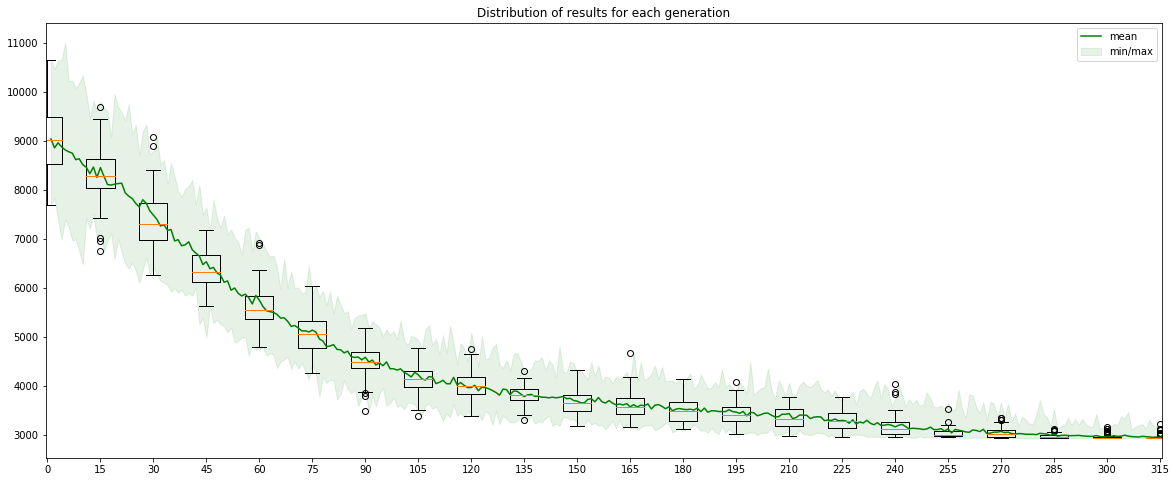

In [31]:
plot_evolution(scores_2, 20)

## Find ACO solution for problem 3

In [32]:
problem = TSPProblem(problem=3)
initializer = TSP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.05)
heuristic = TSPHeuristic
solution_gen = PermutationSolutionGenerator(number_of_ants=50, alpha=1, beta=0, heuristic=None, problem=problem)
terminator = [maxItTerminator(maxIt=2000), convergenceTerminator(maxIter=50)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, False)

solutions_3, scores_3 = aco.run()

In [33]:
print('Best score for problem 3, alpha=1, beta=0: ', scores_3[-1,0])

Best score for problem 3, alpha=1, beta=0:  4530


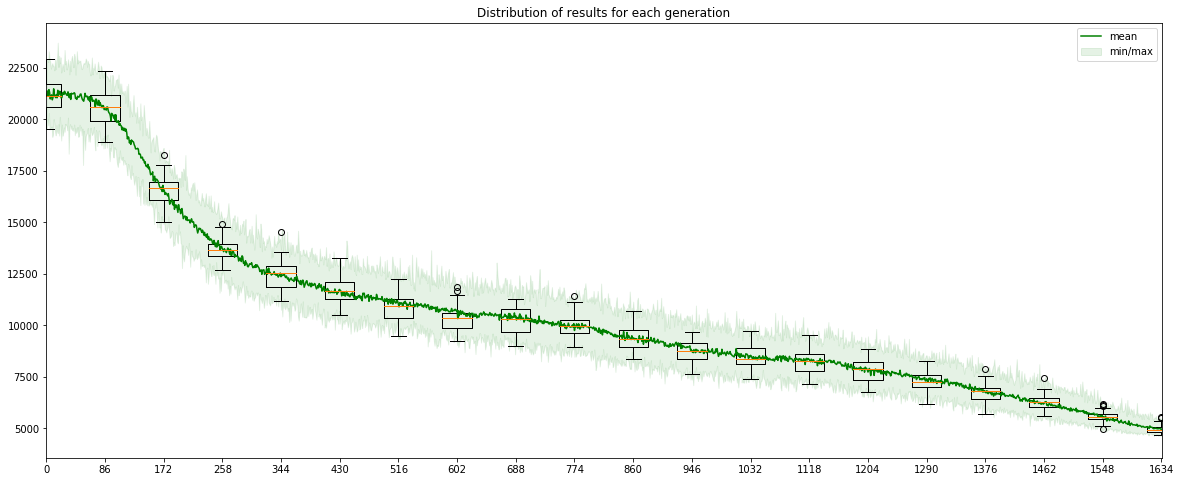

In [34]:
plot_evolution(scores_3, 20)

In [35]:
solution_gen = PermutationSolutionGenerator(number_of_ants=50, alpha=1, beta=1, heuristic=heuristic, problem=problem)
terminator = [maxItTerminator(maxIt=2000), convergenceTerminator(maxIter=50)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, False)

solutions_3, scores_3 = aco.run()

In [36]:
print('Best score for problem 3, alpha=1, beta=1: ', scores_3[-1,0])

Best score for problem 3, alpha=1, beta=1:  2894


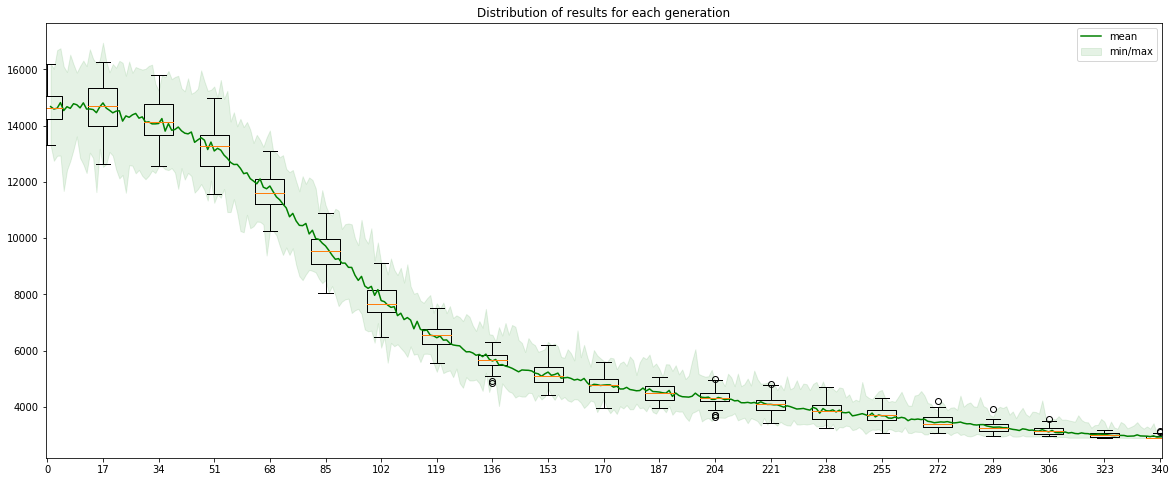

In [37]:
plot_evolution(scores_3, 20)

In [38]:
solution_gen = PermutationSolutionGenerator(number_of_ants=50, alpha=1, beta=2, heuristic=heuristic, problem=problem)
terminator = [maxItTerminator(maxIt=2000), convergenceTerminator(maxIter=50)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, False)

solutions_3, scores_3 = aco.run()

In [39]:
print('Best score for problem 3, alpha=1, beta=2: ', scores_3[-1,0])

Best score for problem 3, alpha=1, beta=2:  2586


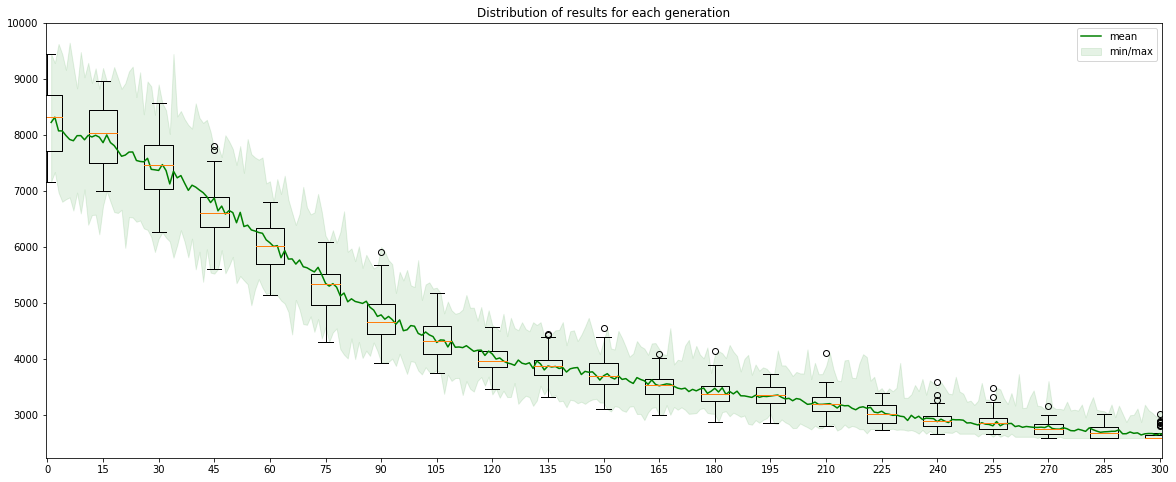

In [40]:
plot_evolution(scores_3, 20)

In [41]:
solution_gen = PermutationSolutionGenerator(number_of_ants=50, alpha=1, beta=2, heuristic=heuristic, problem=problem)
terminator = [maxItTerminator(maxIt=2000), convergenceTerminator(maxIter=50)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 3, True)

solutions_3, scores_3 = aco.run()

In [42]:
print('Best score for problem 3, alpha=1, beta=2 + quality dependent pheromone update: ', scores_3[-1,0])

Best score for problem 3, alpha=1, beta=2 + quality dependent pheromone update:  2614


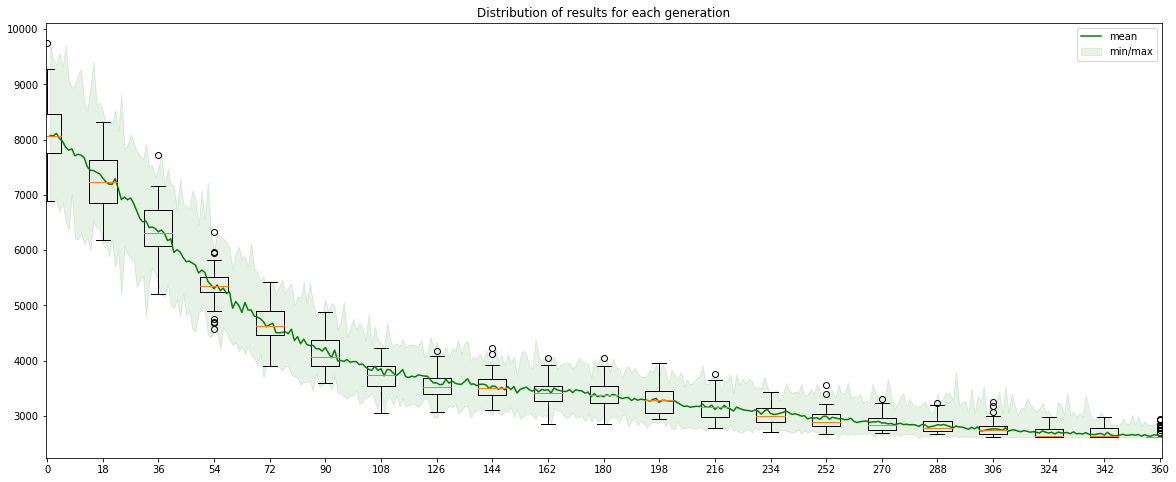

In [43]:
plot_evolution(scores_3, 20)

Observations & conclusions:
+ Development of the score over iterations very similar for same parameters (for different problems)
+ Applying distance heuristic / increasing beta significantly improves results:
    + ...accelerates decrease of score from the beginning
    + ...leads to faster convergence / requires fewer iterations
    + ...allows for bigger search space in the beginning (- with sufficient #ants)
    + ...but narrows down search space faster over iterations
+ Increasing #solutions + quality dependent pheromone update sometimes improves result